# Ensembles in phase-space

:::{admonition} **What you will learn**

- Counting microstates in quantum systems or lattice models is natural as these systems are already discretized
- Defining microstates in classical mechanics requires us to divide phase-space into small volumes of size $\sim h^N$
- Using classical hailtonians for non-interacting particles we can derive a number of useful relations between free energies chemical potentials.
- Equipartition theorem says ever quadratic degree term in Hamiltonian contributes $kT$ of energy
- De Broglie wavelength demarcates domain of applicability of classical and quantum mechanics

:::

### Computing Z via classical mechanics

- In quantum mechanics counting microsites is easy, we have discrete energies and  could simply sum over microstates to compute partition functions 

$$Z=\sum_i e^{-\beta E_i}$$

- Each particle in quantum mechanics can not be defined beyond $\delta d \delta p \sim h$ limit imposed by quantum mechanics. 
- Counting microstates in classical mechanics is therefore done by discretizing phase space for N particle system $x^N, p^N$ into smallest unit boxes of size $h^N$.
 
- In other words, we replace summation over quantum states with integral over phase space 

$$\sum_i \rightarrow \int \frac{dpdx}{h}$$

- Recall that we need to correct classical mechanics for "double counting" microstates if we have N indistinguishable "particles" with a factor of $N!$  

:::{admonition} **Classical partition function**
:class: important 

$$Z(\beta) = \frac{1}{N! h^{N}} \int e^{-\beta H(x^N, p^N)} dx^N dp^N$$

:::

## The power and utility of NVT: The non-interacting system

- For the independent particle system, the energy of each particle enter the total energy of the system additively.  

$$E(\epsilon_1, \epsilon_2, ... \epsilon_N) = \epsilon_1+\epsilon_2+...\epsilon_N$$

- The exponential factor in the partition function allows decoupling particle contributions $e^{-\beta{(\epsilon_1+\epsilon_2)}} = e^{-\beta{\epsilon_1}}e^{-\beta{\epsilon_2}}$. This means that the partition function can be written as the product of the partition functions of individual particles!

$$Z = \sum^{n=N}_{n=0} e^{-\beta E_n} =  \Big (\sum^{i=1}_{i=0} e^{-\beta \epsilon_i} \Big)\Big (\sum^{i=1}_{i=0} e^{-\beta \epsilon_i} \Big)...\Big (\sum^{i=1}_{i=0} e^{-\beta \epsilon_i} \Big)= z_1 \cdot z_2 \cdot z_3 ... z_N$$


**Distinguishable states**:

$$Z = z_1 \cdot z_2 \cdot z_3 ... z_N$$

**Indistinguishable states**:

$$ Z = \frac{1}{N!}z^N $$

:::{admonition} **General strategy for using NVT for simple non-interacting systems**
:class: tip

1. Compute the **single particle partition function** $z= e^{-\beta \epsilon_1}+  e^{-\beta \epsilon_2}+ ...$

2. To compute **full partition function**, raise z to the power of N and apply factorial in case of indistinguishable particles  $Z = \frac{1}{N!}z$ or take product in case of distinguishable identical particles $z^N$

3. Compute the **free energy** $F= - k_B T log Z$

4. Take **derivatives of free energy** to get the thermodynamic quantities. E.g one is often interested in computing temperature dependence of $\mu(T), U(T), S(T)$
:::

In [7]:
from ipywidgets import interact

@interact(eps=(0.5,10, 0.5))
def E_two_sys(eps=1):
    
    N       = 1
    kbT     =  np.linspace(0,5,1000)/eps
    E_eps   = N/(1+np.exp(1/kbT))
    
    plt.plot(kbT, E_eps, lw=3)
    plt.xlabel('$k_B T/\epsilon$')
    plt.ylabel('$E/\epsilon$')
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='eps', max=10.0, min=0.5, step=0.5), Output()), _dom_…

### Example-2: Ideal gas (classical)

$$H(p^N, x^N) = K(p^N)  = \sum^{i=N}_{i=1}\frac{p^2_i}{2m}$$

**Partition function for a single atom**

- Let us evaluate the partition function for a single particle in 3D:

$$Z(\beta) =  \Bigg [\frac{1}{h} \int_{L} dx \int^{+\infty}_{-\infty} dp e^{-\beta \frac{p^2}{2m}}  \Bigg ]^3 = V \Big [ \frac{2\pi m}{h \beta} \Big]^{3/2} = V n_Q$$

**On the validity of classical approximation**

- We wrote down the partition sum in terms of the volume of the container and a quantum density $n_Q$ 

- As long as interatomic distances are larger than De-Broglie thermal wavelength, classical approximation is good

$$n_Q = \Big [ \frac{m k_B T}{2 \hbar^2} \Big]^{3/2} = \frac{1}{\lambda^3_T}$$
$$\lambda_T = \frac{h}{2mk_BT} \sim \frac{h}{m \bar{v}}$$

**Partition function for N atoms**

$$Z = \frac{Z^N}{N!}  = \frac{(V n_Q)^N}{N!}$$

- Using the curdest version of Striling's approximation $N!\approx N^N e^{-N}$ and denoting $n = N/V$ as the density we get

$$Z = \Big[ \frac{n_Q}{n}\Big]^N e^N$$

$$F = -k_B T log Z = -N k_B T  log \Big( \frac{n_Q}{n} \Big) - Nk_BT$$

- We can also calculate entropy and other thermodynamic quantities and compare with expressions obtained in NVE

$$S = -\Big( \frac{\partial F}{\partial T}\Big)_{N,V} = Nk_B log \Big( \frac{n_Q}{n} \Big) + Nk_B + \frac{3}{2}Nk_B$$


**Entropy**
$$S = Nk_B \Bigg[log \Big( \frac{n_Q}{n} \Big)+ \frac{5}{2} \Bigg]$$

**Mean energy**

$$U = \frac{\partial log Z}{\partial (-\beta)} = \frac{3}{2}N k_B T$$

**Pressure and ideal gas law**
$$p = -\frac{\partial F}{\partial V} =\frac{N k_B T}{V}$$

**Chemical potential**

$$\mu = k_B T \cdot log  \Big(\frac{n}{n_Q(T)}\Big)$$

Text(0.5, 0, 'B')

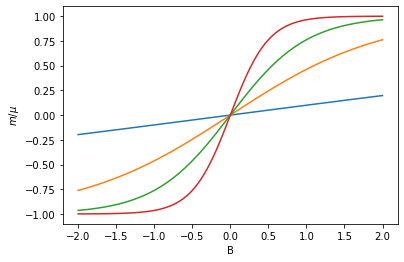

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-2, 2, 100)

for beta in [0.1, 0.5, 1, 2]:
    plt.plot(x, np.tanh(beta*x))
    
plt.ylabel('$m/\mu$')    
plt.xlabel('B')

## Non-interacting molecules

### Translational degrees of freedom: particle in a box

$$E_{n_x, n_y, n_z} = \frac{\hbar^2 \pi^2}{2m L^2} \big(n^2_x+n^2_y+n^2_z \big)$$

$$ Z \approx \Bigg [\int^{\infty}_0 dn e^{-\frac{\hbar^2 \pi^2}{2m k_B TL^2}n^2} \Bigg]^{3} = V \Bigg[\frac{m k_B T}{2\pi \hbar^2} \Bigg]^{3/2} =  V n_Q$$

- For $N$ molecules in a box
  
$$Z= \frac{(V n_Q)^N}{N!}$$

### Rotatational degrees of freedom: Rigid rotor model 

$$E = \frac{\hbar^2}{2I} J (J+1) $$

$$Z \approx \int^{J=\infty}_{J=0} (2J+1)e^{-\Big[\beta \frac{\hbar^2}{2I} J (J+1)\Big]}\approx \frac{T}{\theta_{rot}}$$

- Where $\theta_{rot} = \frac{\hbar^2}{2 I_0 k_B}$ is called rotational temperature. 

### Vibrational degrees of freedom: Harmonic oscillator model

$$E_n = \hbar \omega (n+1/2)$$

$$z = \sum^{n=+\infty}_{n=0} = e^{-\frac{1}{2}\beta \hbar \omega} (1 + e^{-\beta\hbar\omega}+e^{-2\beta\hbar\omega}+...) = \frac{e^{-\frac{1}{2}\beta \hbar \omega}}{1-e^{-\beta\hbar\omega}}$$

$$Z = z^N$$

$$E = \frac{\partial log Z}{\partial (-\beta)} = N\hbar \omega \Big(\frac{1}{2}+ \frac{1}{1+e^{\beta\hbar\omega}} \Big) $$

- When $T \rightarrow 0$ we are left with zero point energies $E \rightarrow \frac{N \hbar \omega}{2}$

- When $T \rightarrow \infty$ we get equipartion of energy! $E \rightarrow \frac{3}{2} N k_B T$

### Partition function for a molecular gas


$$E = E_{transl}+E_{vib}+E_{rot}+E_{elec} $$


$$Z = Z_{transl} Z_{vib} Z_{rot} Z_{elec} $$

### Equipartion theorem

Finally, we can also prove a powerful general result showing us that each degree of freedom that appears in Hamiltonian as a quadratic function, e.g., $kx^2$, contributes on average $\frac{1}{2}k_BT$ of energy. Hence we can count degrees of freedom and write down average energy!

$$U(x) = kx^2 $$

$$\langle U \rangle = \int p(x) U(x) dx = \frac{\int kx^2 e^{-\beta kx^2}dx}{\int e^{-\beta kx^2}dx} = \frac{k_B T}{2}$$

- The answer is found quickly by identifying variance $\sigma^2$ in gaussian function with zero mean $e^{\frac{-x^2}{2\sigma^2}}$
- Notice the spring constant does not figure in the average energy expression!

**Example** Calculate heat capacity of diatomic gas.
  

## Problems

### Problem-1 Elementary derivation of Boltzmann's distirbution

Let us do an elementary derivation of Boltzman distribution showing that when a macroscopic system is in equilibrium and coupled to a heat bath at temperatere $T$ we have a universal dependence of probability for finding system at different energies: 

$$\boxed{P(r')/P(r)=e^{-\beta (U(r)-U(r'))}}$$

The essence of the derivation is this. Consider a vertical column of gas somehre in the mountains.
- On one hand we have graviational force which acts on a column between $h, h+dh$ with cross section $A$. 
- On the other hand we have pressure balance which thankfully keeps the molecules from dropping on the ground. 
- This means that we have a steady density of molecules at each distance $n(h)$ for a fixed $T$. Write down this balance of forces (gravitational vs pressure ) and find show how density at $h$, $n(h)$ is related to density at $h=0$, $n(0)$. 

> Tip: you may use $P=nkT$ for pressure and $mgh$ for the gravitational force) 

### Problem-4 2D diploes on a lattice

Consider a 2D square lattice with $M$ lattice points. On each point we have a mangeetic moment that can point in four possible directions: $+x, -x, +y, -y$. Along $y$ axis, the dipole has the energy $\epsilon>0$ and along the x axis $\epsilon=0$.

Dipoles are not interacting with each other and we also ingnore kinetic energy of diplos since they are fixed at lattice positions. 

- Write down parition function for this system $Z$

- Compute the average energy.

- Compute entropy per dipole $s(T)$. Evaluate the difference $S(T=\infty)-S(T=0)$? Can you see a link with number of arrangements of dipols?

- Compute microcanonical partition function $\Omega (N\epsilon)$

- Show that we get the same entropy expression by using $NVE$ and $NVT$ ensembles.

### Problem-5 A typical spin problem 

Due to a ligand field, the degeneracy of d-orbital of chromium ion $Cr^{3+}$ is partially lifted. The spin part of the hamiltonian that lifts this degeneracy has the following form.

$$H =  D \big(S_z^2 -S(S+1)/2 \big)$$

Where $D>0$ is some constant and $S=3/2$ (the cation has an electronic term ${F}^ 4_{3/2}$

- Conceptual question: Why can we apply statisical mechanics to a "single" ion?

- Obtain the occupation probability of each discrete energy level $P(E)$.

- Calculate the entropy and the specific heat then show that heat capacity behaves as $T^{-2}$ at high temperatures.

- Supose heat capacity is $C=k_b \Big(\frac{T}{T_0} \Big)^2$ with $T_0=0.18 K$ at higher temperatures. Determine the energy spacing. 